In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# 读取包含五个指标的CSV文件
features_csv_path = 'analysis_data/indicator.csv'
features_df = pd.read_csv(features_csv_path)

# 读取包含犯罪率的CSV文件
crime_csv_path = 'analysis_data/crime.csv'
crime_df = pd.read_csv(crime_csv_path)

# 合并两个数据集，假设他们有共同的地区标识符
merged_df = features_df.merge(crime_df, on='Area', how='inner')

# 移除指定区域的数据行
areas_to_remove = ['E01000001', 'E01000002', 'E01000003', 'E01000005', 'E01032739', 'E01032740']
merged_df = merged_df[~merged_df['Area'].isin(areas_to_remove)]

print(merged_df)

           Area  ethnic_2011  ethnic_2021  education_2011  education_2021  \
6     E01004647        0.338        0.405           0.507           0.415   
7     E01004649        0.446        0.528           0.505           0.302   
8     E01004724        0.365        0.331           0.468           0.387   
9     E01004730        0.395        0.457           0.463           0.307   
10    E01004646        0.325        0.410           0.464           0.443   
...         ...          ...          ...             ...             ...   
4830  E01002496        0.270        0.446           0.748           0.649   
4831  E01002497        0.315        0.449           0.738           0.581   
4832  E01002498        0.251        0.399           0.715           0.587   
4833  E01002499        0.300        0.368           0.733           0.635   
4834  E01032577        0.251        0.458           0.734           0.603   

      elderly_2011  elderly_2021  unemployed_2011  unemployed_2021  \
6    

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

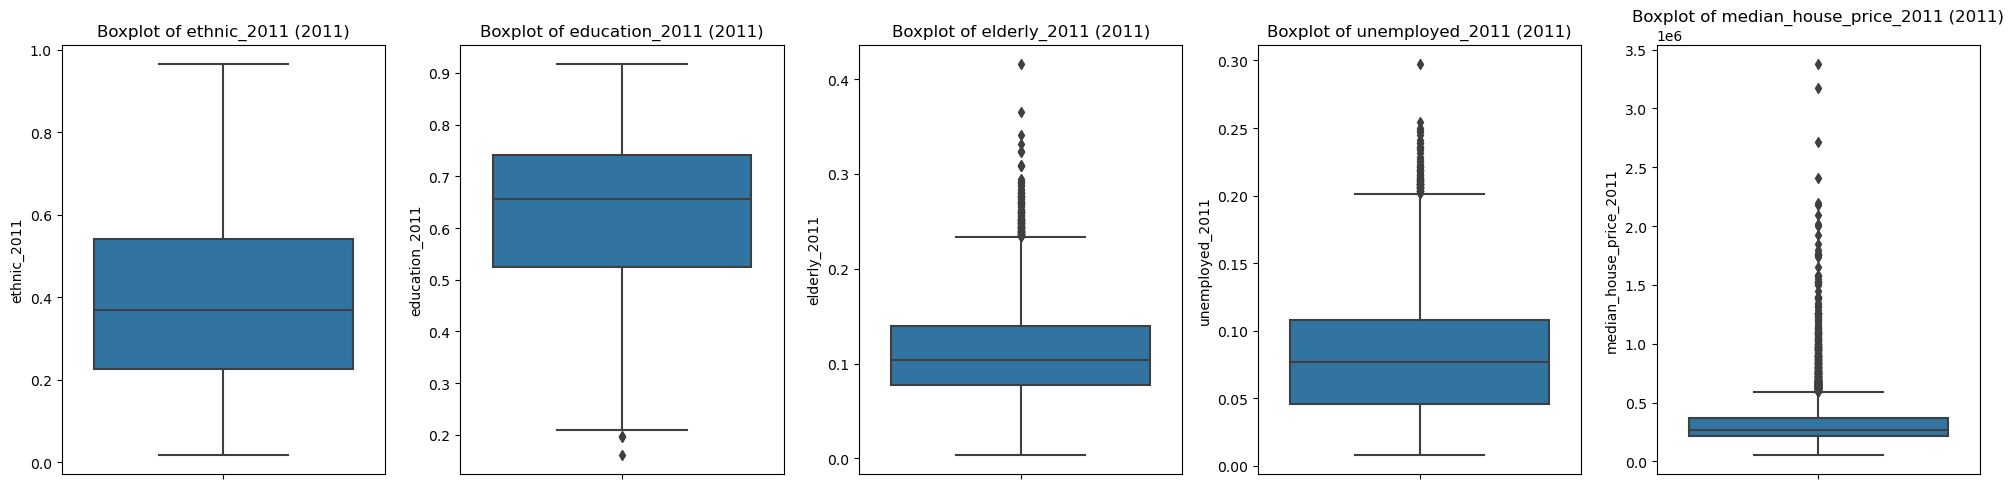

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

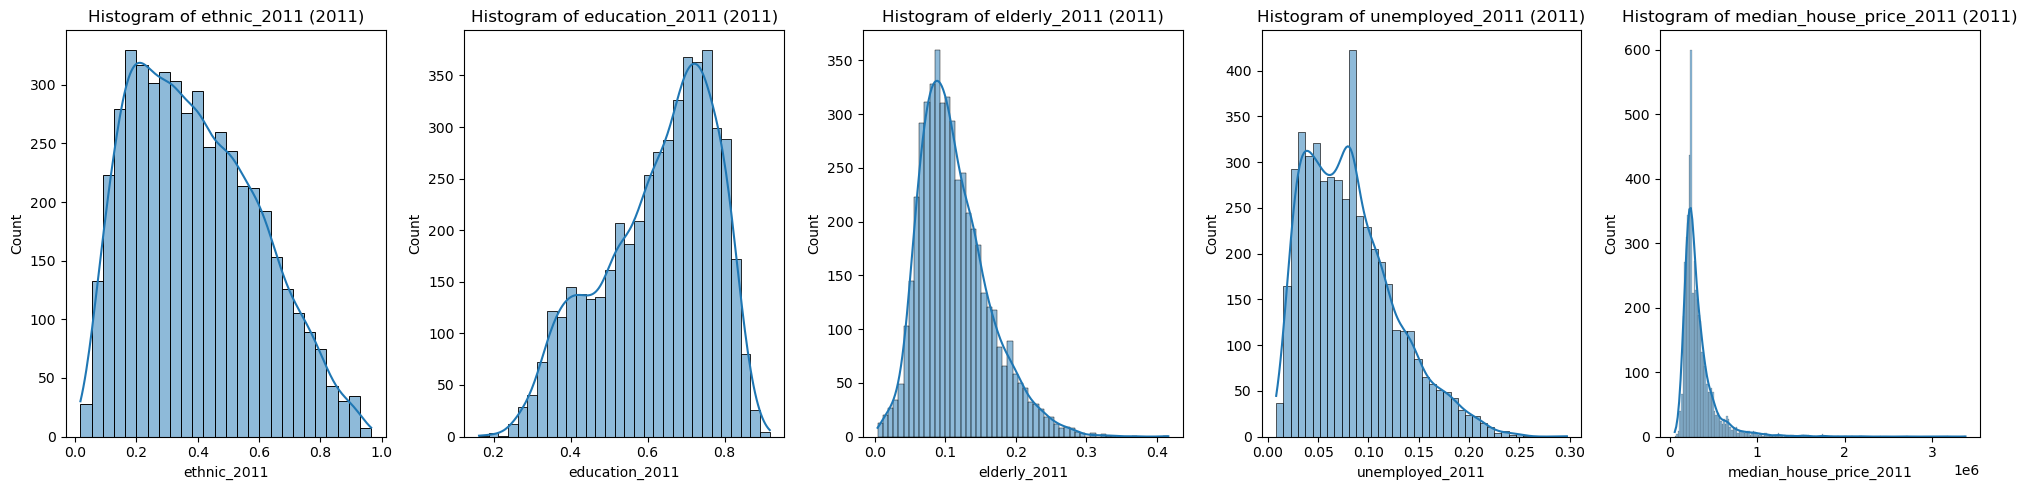

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

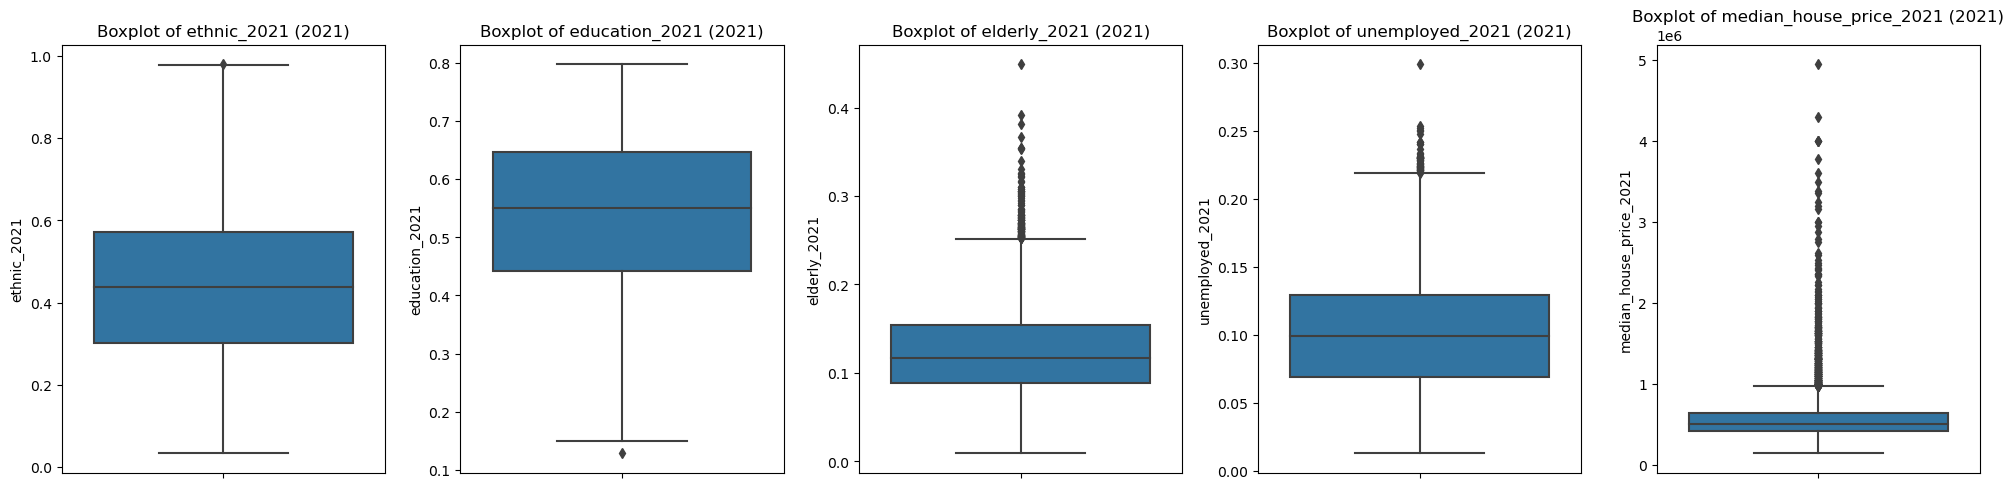

/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_conte

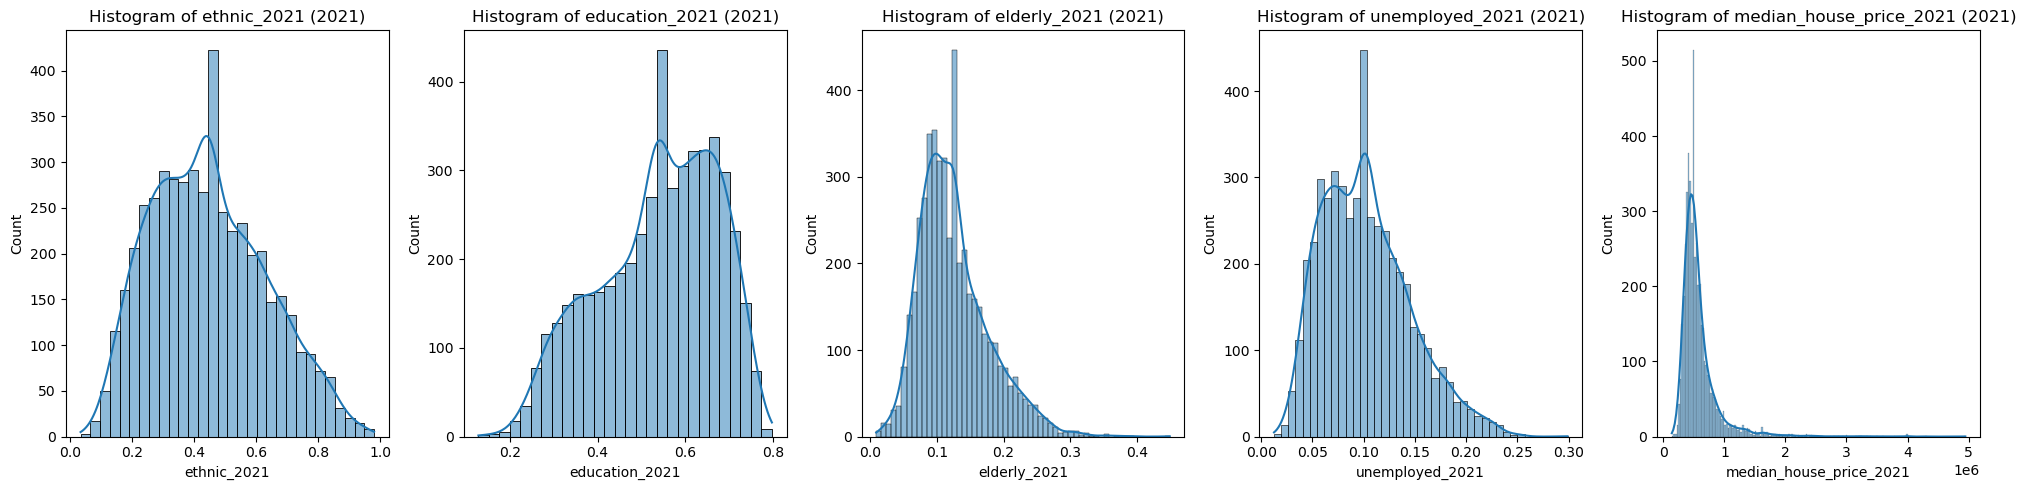

In [2]:
# 假设 merged_df 是已经加载的数据集
# 选择特征变量和目标变量
X1 = merged_df[['ethnic_2011', 'education_2011', 'elderly_2011', 'unemployed_2011', 'median_house_price_2011']]  # 特征
y1 = merged_df[['crime_2011']]  # 目标

X2 = merged_df[['ethnic_2021', 'education_2021', 'elderly_2021', 'unemployed_2021', 'median_house_price_2021']]  # 特征
y2 = merged_df[['crime_2021']]  # 目标

# 绘制 2011 年的箱型图
fig, axs = plt.subplots(1, 5, figsize=(20, 5))
for i, col in enumerate(X1.columns):
    sns.boxplot(data=X1, y=col, ax=axs[i])
    axs[i].set_title(f'Boxplot of {col} (2011)')
plt.tight_layout()
plt.show()

# 绘制 2011 年的柱状图和趋势线
fig, axs = plt.subplots(1, 5, figsize=(20, 5))
for i, col in enumerate(X1.columns):
    sns.histplot(X1[col], kde=True, ax=axs[i])
    axs[i].set_title(f'Histogram of {col} (2011)')
plt.tight_layout()
plt.show()

# 绘制 2021 年的箱型图
fig, axs = plt.subplots(1, 5, figsize=(20, 5))
for i, col in enumerate(X2.columns):
    sns.boxplot(data=X2, y=col, ax=axs[i])
    axs[i].set_title(f'Boxplot of {col} (2021)')
plt.tight_layout()
plt.show()

# 绘制 2021 年的柱状图和趋势线
fig, axs = plt.subplots(1, 5, figsize=(20, 5))
for i, col in enumerate(X2.columns):
    sns.histplot(X2[col], kde=True, ax=axs[i])
    axs[i].set_title(f'Histogram of {col} (2021)')
plt.tight_layout()
plt.show()

In [14]:
X1.describe()

,ethnic_2011,education_2011,elderly_2011,unemployed_2011,median_house_price_2011
count,4829.000000,4829.000000,4829.000000,4829.000000,4.829000e+03
mean,0.393094,0.627440,0.112719,0.081748,3.300688e+05
std,0.203533,0.145032,0.049413,0.044923,2.145157e+05
min,0.018000,0.162000,0.004000,0.008234,5.800000e+04
25%,0.225000,0.525000,0.077000,0.045789,2.175000e+05
50%,0.369000,0.656000,0.104000,0.076455,2.680000e+05
75%,0.541000,0.742000,0.140000,0.108087,3.684950e+05
max,0.965000,0.917000,0.416000,0.297358,3.377000e+06


In [15]:
X2.describe()

,ethnic_2021,education_2021,elderly_2021,unemployed_2021,median_house_price_2021
count,4829.000000,4829.000000,4829.000000,4829.000000,4.829000e+03
mean,0.445376,0.537997,0.125616,0.102204,5.819382e+05
std,0.184471,0.133938,0.052018,0.042816,3.331421e+05
min,0.033000,0.128000,0.009000,0.012548,1.377500e+05
25%,0.301000,0.442000,0.089000,0.068841,4.100000e+05
50%,0.438000,0.551000,0.117000,0.099135,5.000000e+05
75%,0.572000,0.647000,0.154000,0.128904,6.320000e+05
max,0.980000,0.798000,0.449000,0.298964,4.947500e+06


In [3]:
scaler = StandardScaler()
X1_scaled = scaler.fit_transform(X1)  # 2011 年数据
X2_scaled = scaler.fit_transform(X2)  # 2021 年数据

# 计算标准化后的数据的VIF
def calculate_vif_scaled(X_scaled):
    vif_data = pd.DataFrame()
    vif_data["feature"] = X1.columns
    vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
    return vif_data

vif_2011_scaled = calculate_vif_scaled(X1_scaled)
vif_2021_scaled = calculate_vif_scaled(X2_scaled)

print("2011:")
print(vif_2011_scaled)
print("2021:")
print(vif_2021_scaled)

2011:
                   feature       VIF
0              ethnic_2011  2.517756
1           education_2011  2.337166
2             elderly_2011  1.694716
3          unemployed_2011  3.058836
4  median_house_price_2011  1.650879
2021:
                   feature       VIF
0              ethnic_2011  2.701143
1           education_2011  2.352458
2             elderly_2011  1.506916
3          unemployed_2011  3.323904
4  median_house_price_2011  1.552727


In [4]:
# 使用 OLS 进行回归分析
X1_const = sm.add_constant(X1_scaled)  # 添加常数项

# 将数据转换为 DataFrame 并添加列名
X1_const_df = pd.DataFrame(X1_const, columns=['const', 'ethnic_2011', 'education_2011', 'elderly_2011', 'unemployed_2011', 'median_house_price_2011'])

# 重置索引
y1 = y1.reset_index(drop=True)
X1_const_df = X1_const_df.reset_index(drop=True)

# 拟合模型
model_2011 = sm.OLS(y1['crime_2011'], X1_const_df).fit()

# 提取残差
merged_df['residuals_2011'] = model_2011.resid

# 打印回归结果
print("OLS Regression Results for 2011 Crime Rate:")
print(model_2011.summary())


OLS Regression Results for 2011 Crime Rate:
                            OLS Regression Results                            
Dep. Variable:             crime_2011   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     36.01
Date:                Tue, 13 Aug 2024   Prob (F-statistic):           2.55e-36
Time:                        05:36:38   Log-Likelihood:                 3823.0
No. Observations:                4829   AIC:                            -7634.
Df Residuals:                    4823   BIC:                            -7595.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

In [5]:
# 使用 OLS 进行回归分析
X2_const = sm.add_constant(X2_scaled)  # 添加常数项

# 将数据转换为 DataFrame 并添加列名
X2_const_df = pd.DataFrame(X2_const, columns=['const', 'ethnic_2021', 'education_2021', 'elderly_2021', 'unemployed_2021', 'median_house_price_2021'])

# 重置索引
y2 = y2.reset_index(drop=True)
X2_const_df = X2_const_df.reset_index(drop=True)

# 拟合模型
model_2021 = sm.OLS(y2['crime_2021'], X2_const_df).fit()

# 提取残差
merged_df['residuals_2021'] = model_2021.resid

# 打印回归结果
print("OLS Regression Results for 2021 Crime Rate:")
print(model_2021.summary())


OLS Regression Results for 2021 Crime Rate:
                            OLS Regression Results                            
Dep. Variable:             crime_2021   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     75.99
Date:                Tue, 13 Aug 2024   Prob (F-statistic):           6.75e-77
Time:                        05:36:38   Log-Likelihood:                 5122.8
No. Observations:                4829   AIC:                        -1.023e+04
Df Residuals:                    4823   BIC:                        -1.019e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

In [6]:
print(merged_df)

           Area  ethnic_2011  ethnic_2021  education_2011  education_2021  \
6     E01004647        0.338        0.405           0.507           0.415   
7     E01004649        0.446        0.528           0.505           0.302   
8     E01004724        0.365        0.331           0.468           0.387   
9     E01004730        0.395        0.457           0.463           0.307   
10    E01004646        0.325        0.410           0.464           0.443   
...         ...          ...          ...             ...             ...   
4830  E01002496        0.270        0.446           0.748           0.649   
4831  E01002497        0.315        0.449           0.738           0.581   
4832  E01002498        0.251        0.399           0.715           0.587   
4833  E01002499        0.300        0.368           0.733           0.635   
4834  E01032577        0.251        0.458           0.734           0.603   

      elderly_2011  elderly_2021  unemployed_2011  unemployed_2021  \
6    

In [7]:
import geopandas as gpd

# 读取shapefile
shapefile_path = 'data/statistical-gis-boundaries-london/ESRI/LSOA_2011_London_gen_MHW.shp'
gdf = gpd.read_file(shapefile_path)

# 假设shapefile包含一个唯一标识符字段 'LAD11CD'
# 将shapefile与残差数据结合，shapefile为主
gdf = gdf.merge(merged_df, left_on='LSOA11CD', right_on='Area', how='left')

print(gdf)

       LSOA11CD                   LSOA11NM   MSOA11CD  \
0     E01000001        City of London 001A  E02000001   
1     E01000002        City of London 001B  E02000001   
2     E01000003        City of London 001C  E02000001   
3     E01000005        City of London 001E  E02000001   
4     E01000006  Barking and Dagenham 016A  E02000017   
...         ...                        ...        ...   
4830  E01033742             Greenwich 007F  E02000319   
4831  E01033743             Greenwich 002H  E02000314   
4832  E01033744             Greenwich 007G  E02000319   
4833  E01033745             Greenwich 002I  E02000314   
4834  E01033746             Greenwich 038E  E02006931   

                      MSOA11NM    LAD11CD               LAD11NM    RGN11CD  \
0           City of London 001  E09000001        City of London  E12000007   
1           City of London 001  E09000001        City of London  E12000007   
2           City of London 001  E09000001        City of London  E12000007   
3  

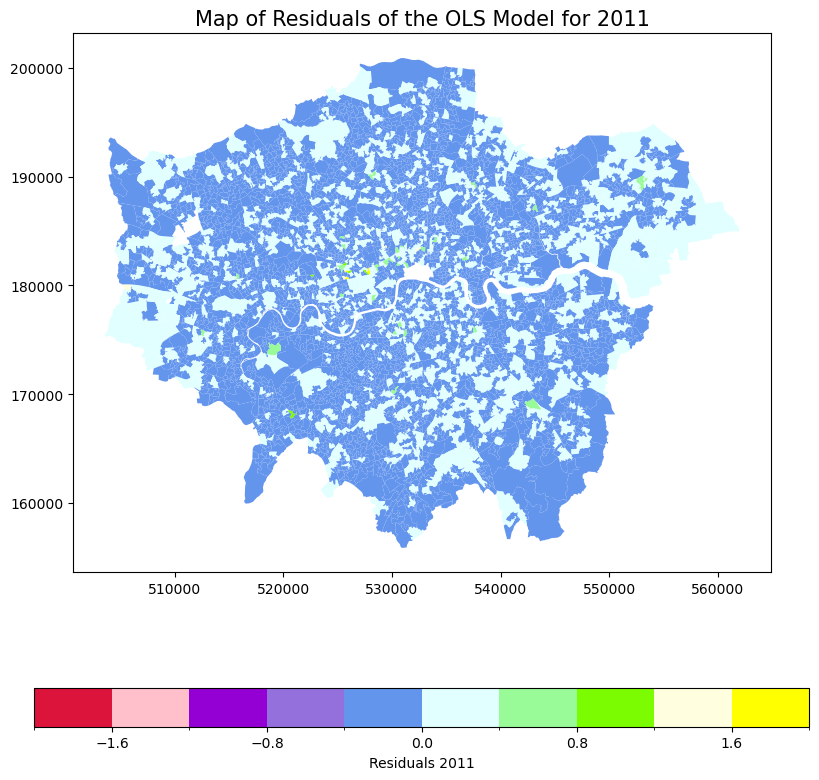

In [13]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm

colors = ['#DC143C', '#FFC0CB', '#9400D3', '#9370DB', '#6495ED', '#E1FFFF', '#98FB98', '#7CFC00', '#FFFFE0', '#FFFF00']
bounds = [-2, -1.6, -1.2, -0.8, -0.4, 0, 0.4, 0.8, 1.2, 1.6, 2]  # 定义每个颜色对应的数值区间边界

# 创建自定义的colormap和norm
cmap = ListedColormap(colors[:len(bounds)-1])  # 使用适当数量的颜色
norm = BoundaryNorm(bounds, ncolors=len(cmap.colors))

# 绘制地图
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
# gdf.boundary.plot(ax=ax, linewidth=0.1, edgecolor='black')  # 绘制边框
gdf.plot(column='residuals_2011', cmap=cmap, norm=norm, legend=True, ax=ax,
         legend_kwds={'label': "Residuals 2011", 'orientation': "horizontal"})

# 添加标题
ax.set_title("Map of Residuals of the OLS Model for 2011", fontsize=15)

# 显示图像
plt.show()


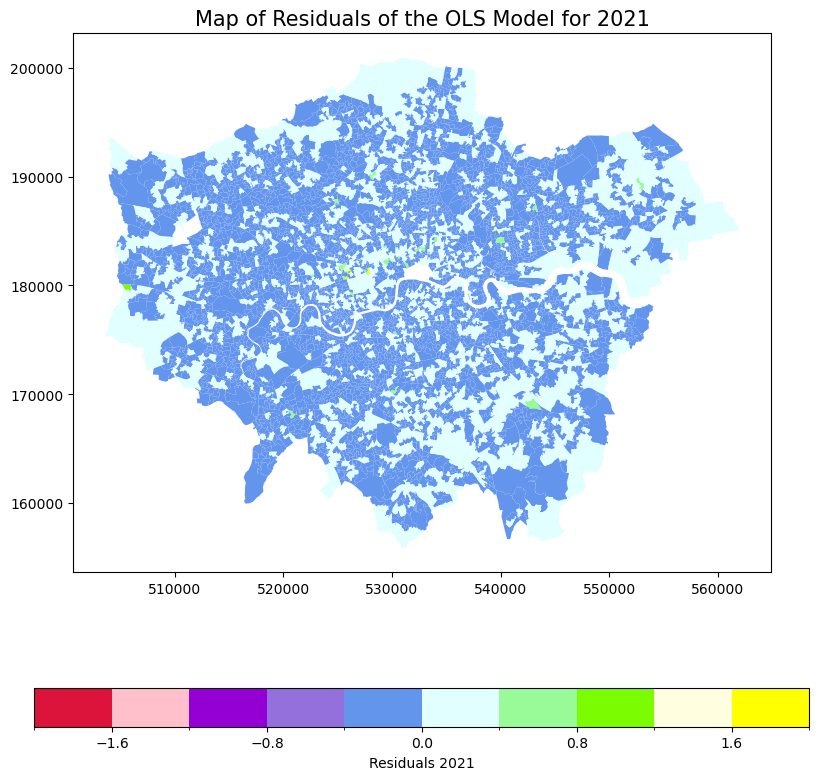

In [9]:
colors = ['#DC143C', '#FFC0CB', '#9400D3', '#9370DB', '#6495ED', '#E1FFFF', '#98FB98', '#7CFC00', '#FFFFE0', '#FFFF00']
bounds = [-2, -1.6, -1.2, -0.8, -0.4, 0, 0.4, 0.8, 1.2, 1.6, 2]  # 定义每个颜色对应的数值区间边界

# 创建自定义的colormap和norm
cmap = ListedColormap(colors[:len(bounds)-1])  # 使用适当数量的颜色
norm = BoundaryNorm(bounds, ncolors=len(cmap.colors))

# 绘制地图
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
# gdf.boundary.plot(ax=ax, linewidth=0.1, edgecolor='black')  # 绘制边框
gdf.plot(column='residuals_2021', cmap=cmap, norm=norm, legend=True, ax=ax,
         legend_kwds={'label': "Residuals 2021", 'orientation': "horizontal"})

# 添加标题
ax.set_title("Map of Residuals of the OLS Model for 2021", fontsize=15)

# 显示图像
plt.show()

In [11]:
from esda import moran
import numpy as np
from scipy import stats
from libpysal.weights import KNN
import libpysal as ps

# 重新检查和合并数据
gdf = gdf.dropna(subset=['residuals_2011'])  # 确保没有 NaN 值

# 确保索引一致
gdf = gdf.set_index('LSOA11CD').sort_index()

# 检查是否所有的index都匹配
if not all(gdf.index == gdf.index):
    raise ValueError("GeoDataFrame and merged DataFrame indices do not match!")

# 使用K近邻权重矩阵，k=6表示每个区域至少有6个邻居
w = KNN.from_dataframe(gdf, k=6)
w.transform = 'r'

# 创建空间滞后变量
lag_residuals = weights.lag_spatial(w, gdf['residuals_2011'])

# 继续执行 L-M 检验
moran_residuals = moran.Moran(gdf['residuals_2011'], w)

print(f"Moran's I: {moran_residuals.I}")
print(f"Expected I: {moran_residuals.EI}")
print(f"p-value: {moran_residuals.p_norm}")

# 确保没有缺失值
gdf = gdf.dropna(subset=['residuals_2011'])

# 计算滞后残差
lag_residuals = weights.lag_spatial(w, gdf['residuals_2011'])

# 计算残差平方和 (SSE)
SSE = sum(gdf['residuals_2011']**2)

# 计算 LM Error
lambda_hat = np.dot(lag_residuals, gdf['residuals_2011']) / SSE
LM_Error = (lambda_hat**2) * len(gdf['residuals_2011'])
p_value_error = stats.chi2.sf(LM_Error, 1)

# 输出 LM Error 和 p 值
print(f"LM Error: {LM_Error}")
print(f"p-value for LM Error: {p_value_error}")

# 计算 crime_2011 的滞后项
lag_crime = weights.lag_spatial(w, gdf['crime_2011'])

# 计算残差平方和 (SSE)
SSE = sum(gdf['residuals_2011']**2)

# 计算 LM Lag
rho_hat = np.dot(lag_crime, gdf['residuals_2011']) / SSE
LM_Lag = (rho_hat**2) * len(gdf['residuals_2011'])
p_value_lag = stats.chi2.sf(LM_Lag, 1)

# 输出 LM Lag 和 p 值
print(f"LM Lag: {LM_Lag}")
print(f"p-value for LM Lag: {p_value_lag}")


KeyError: "None of ['LSOA11CD'] are in the columns"

In [ ]:
import numpy as np
import spreg
from pysal.lib import weights

# 假设 y 是您的因变量，如 crime_2011
y = gdf['crime_2011'].values.reshape(-1, 1)

# X 是自变量矩阵，这里假设您使用的是之前标准化后的变量
X = gdf[['ethnic_2011', 'education_2011', 'elderly_2011', 'unemployed_2011', 'median_house_price_2011']].values

# 构建空间权重矩阵
w = weights.KNN.from_dataframe(gdf, k=6)
w.transform = 'r'  # 标准化权重矩阵

# 拟合空间误差模型
error_model = spreg.ML_Error(y, X, w=w, name_y='crime_2011', name_x=['ethnic_2011', 'education_2011', 'elderly_2011', 'unemployed_2011', 'median_house_price_2011'])

# 打印模型结果
print(error_model.summary)

In [ ]:
# 替换为实际的误差模型残差
error_model_residuals = error_model.e_filtered  # 假设你有误差模型的 e_filtered 残差
error_model_moran = Moran(error_model_residuals, w, permutations=199)

# Step 3: 绘制 Moran's I 相关图形
plot_moran(error_model_moran, zstandard=True, figsize=(10, 4))

# 设置标题（如果需要）
plt.suptitle("Moran's I Analysis of Error Model Residuals", fontsize=16)
plt.show()

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# 假设 `gdf` 是包含空间信息的 GeoDataFrame，且已经有 `filtered_residuals` 列
gdf['filtered_residuals'] = error_model.u  # 假设 `error_model.u` 包含 SEM 模型的过滤残差

# 定义颜色映射和区间
colors = ['#DC143C', '#FFC0CB', '#9400D3', '#9370DB', '#6495ED', '#E1FFFF', '#98FB98', '#7CFC00', '#FFFFE0', '#FFFF00']
bounds = [-2, -1.6, -1.2, -0.8, -0.4, 0, 0.4, 0.8, 1.2, 1.6, 2]

# 创建自定义的colormap和norm
cmap = ListedColormap(colors * (len(bounds) // len(colors)))
norm = BoundaryNorm(bounds, cmap.N)

# 绘制地图
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf.plot(column='filtered_residuals', cmap=cmap, norm=norm, legend=True, ax=ax,
         legend_kwds={'label': "Filtered Residuals of SEM Model", 'orientation': "horizontal"})

# 设置标题
ax.set_title('Map of Filtered Residuals of the SEM Model')

# 显示图像
plt.show()
